## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [90]:
# answer goes here

nba= pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv')
nba



,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,0.367,0.2,1.1,0.217,1.3,3.0,0.423,0.396,0.5,0.6,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
2139,2016,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,0.529,0.0,0.1,0.100,3.2,5.8,0.539,0.530,2.4,3.2,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [91]:
# see if players are unique 
nba['Player'].value_counts()

Lance Stephenson    7
Ersan İlyasova      7
Omri Casspi         7
Bojan Bogdanović    6
Jerami Grant        6
                   ..
Mikal Bridges       1
Daryl Macon         1
Melvin Frazier      1
Marcus Paige        1
Cleanthony Early    1
Name: Player, Length: 822, dtype: int64

In [0]:
grouped= nba.groupby('Player').mean()
over_10= grouped.loc[grouped['MP']> 10].reset_index()

In [0]:
players= list(over_10['Player'].unique())

In [0]:
# answer goes here
#df = df[~df['date'].isin(a)]


nba = nba[nba['GS'] <20]
nba = nba[~nba['Player'].isin(players)]


In [95]:
nba

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,2019,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,0.300,0.0,0.6,0.000,0.4,0.9,0.500,0.300,0.1,0.3,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
16,2019,Ike Anigbogu,C,20,IND,3,0,2.0,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,0.000,0.000,0.0,0.0,NaN,0.3,0.7,1.0,0.3,0.0,0.3,0.3,0.0,0.0
18,2019,Kostas Antetokounmpo,PF,21,DAL,2,0,5.5,0.0,1.5,0.000,0.0,0.0,NaN,0.0,1.5,0.000,0.000,1.0,2.0,0.500,0.0,0.5,0.5,0.0,1.0,0.0,0.5,0.0,1.0
28,2019,Wade Baldwin,PG,22,POR,16,0,5.9,0.6,2.1,0.303,0.1,0.6,0.222,0.5,1.5,0.333,0.333,0.5,0.7,0.727,0.1,0.8,0.9,0.8,0.1,0.1,0.9,0.7,1.9
59,2019,Isaac Bonga,PG,19,LAL,22,0,5.5,0.2,1.5,0.152,0.0,0.4,0.000,0.2,1.1,0.200,0.152,0.4,0.7,0.600,0.4,0.7,1.1,0.7,0.4,0.2,0.3,0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2016,Elliot Williams,PG,26,MEM,5,0,9.0,0.4,2.0,0.200,0.2,0.8,0.250,0.2,1.2,0.167,0.250,0.6,0.8,0.750,0.2,0.6,0.8,0.8,0.0,0.0,0.2,0.4,1.6
2129,2016,Jeff Withey,C,25,UTA,51,10,12.9,1.7,3.2,0.537,0.0,0.0,0.000,1.7,3.1,0.544,0.537,0.8,1.2,0.729,1.1,2.3,3.4,0.4,0.4,1.0,0.5,1.5,4.3
2130,2016,Christian Wood,PF,20,PHI,17,0,8.5,1.3,3.1,0.415,0.2,0.6,0.364,1.1,2.5,0.429,0.453,0.8,1.2,0.619,0.8,1.5,2.2,0.2,0.3,0.4,0.1,0.6,3.6
2135,2016,James Young,SG,20,BOS,29,0,6.9,0.4,1.2,0.306,0.2,0.9,0.231,0.2,0.3,0.500,0.389,0.0,0.1,0.250,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [0]:
# answer goes here

X= nba[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]



Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

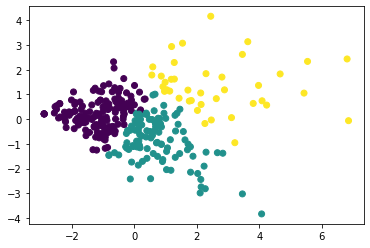

In [153]:
# answer goes here
from sklearn.decomposition import PCA

#scale data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#apply PCA for plotting purposes
X_pca = PCA(n_components=2).fit_transform(X_std)

y_pred = KMeans(n_clusters=3).fit_predict(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [0]:
# answer goes here
#y_new_inverse = scalery.inverse_transform(y_new)

k_means= KMeans(n_clusters=3)
k_means.fit(X_std)
y_pred= k_means.predict(X_std)


In [155]:
print('scaled centroids are:', k_means.cluster_centers_)

scaled centroids are: [[-0.47906529 -0.47869042 -0.60081131 -0.46206342 -0.29365373 -0.6038098 ]
 [ 0.20828846  0.03117226  0.77763394  0.42025139 -0.22398355  0.60888383]
 [ 1.26483869  1.74604646  0.17905078  0.62220755  1.73358071  0.65036405]]


In [156]:
print('unscaled centroids are:', scaler.inverse_transform(k_means.cluster_centers_))

unscaled centroids are: [[1.58366013 0.84379085 0.19542484 0.11111111 0.07712418 0.18300654]
 [2.5587156  1.32477064 0.7293578  0.30550459 0.09174312 0.53302752]
 [4.0575     2.9425     0.4975     0.35       0.5025     0.545     ]]


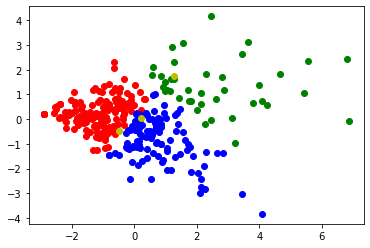

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_std)

#plot the solution
colors='rbg'
for i in range(pca.shape[0]):
  plt.scatter(pca[i,0], pca[i,1], c=colors[y_pred[i]])
for k in range(k_means.cluster_centers_.shape[0]):
  plt.scatter(k_means.cluster_centers_[k,0], k_means.cluster_centers_[k,1], c='y')
plt.show()

In [0]:
# store unscaled cluster centers
k_means.cluster_centers_unscaled= scaler.inverse_transform(k_means.cluster_centers_)

In [160]:
pd.DataFrame(k_means.cluster_centers_unscaled, columns=X.columns)

,PTS,TRB,AST,STL,BLK,TOV
0,1.583660,0.843791,0.195425,0.111111,0.077124,0.183007
1,2.558716,1.324771,0.729358,0.305505,0.091743,0.533028
2,4.057500,2.942500,0.497500,0.350000,0.502500,0.545000


In [0]:
# points, total rebounds, assists, steals, blocks, and turnovers, 
# cluster 2 seems to be elite players with high points and total rebounds
# cluster 1 seems to be average players with ok points and total rebouns, and higher assists (probably to players in cluster 2)
# cluster 0 seems to be 2nd string players with the worst scores accros all meterics

Experiment with different values of K. Do any further interesting archetypes come out?

In [0]:
# answer goes here
# try k with value of 4
k_means= KMeans(n_clusters=4)
k_means.fit(X_std)
y_pred= k_means.predict(X_std)

In [0]:
# store unscaled cluster centers
k_means.cluster_centers_unscaled= scaler.inverse_transform(k_means.cluster_centers_)

In [163]:
pd.DataFrame(k_means.cluster_centers_unscaled, columns=X.columns)

,PTS,TRB,AST,STL,BLK,TOV
0,4.983333,3.505556,0.594444,0.466667,0.650000,0.688889
1,2.718750,1.226562,0.917188,0.357812,0.068750,0.621875
2,1.360504,0.632773,0.206723,0.103361,0.033613,0.176471
3,2.553465,1.725743,0.349505,0.204950,0.215842,0.343564


In [0]:
# this round seemed to follow the same guidlines for clustering players (under different cluster numbers)
# BUT broke the average group into 2 based off number of assists 

In [0]:
# answer goes here
# try k with value of 2
k_means= KMeans(n_clusters=2)
k_means.fit(X_std)
y_pred= k_means.predict(X_std)

In [0]:
# store unscaled cluster centers
k_means.cluster_centers_unscaled= scaler.inverse_transform(k_means.cluster_centers_)

In [166]:
pd.DataFrame(k_means.cluster_centers_unscaled, columns=X.columns)

,PTS,TRB,AST,STL,BLK,TOV
0,3.471569,2.092157,0.704902,0.343137,0.243137,0.585294
1,1.647000,0.889000,0.287000,0.146500,0.085500,0.241000


In [0]:
# elites and non elites 